#### What are Boosting and Bagging?
#### Bagging (Bootstrap Aggregating)
- Definition: Bagging is an ensemble learning technique that combines the predictions from multiple base models (often decision trees) to improve overall performance. It works by training each model on a random subset of the training data (with replacement) and averaging their predictions (for regression) or using majority voting (for classification).

- Key Concept: It reduces variance and helps to prevent overfitting. Each model is built independently, and their predictions are aggregated to form a final prediction.

#### Boosting
- Definition: Boosting is another ensemble technique that aims to improve the model's performance by combining weak learners (models that perform slightly better than random guessing) sequentially. Each new model focuses on the errors made by the previous ones, assigning more weight to misclassified instances.

- Key Concept: Boosting reduces both bias and variance by focusing on hard-to-predict instances and iteratively improving the model.

#### Random Data Generation for Plotting
We'll generate synthetic data for both boosting and bagging, using a binary classification problem for demonstration.

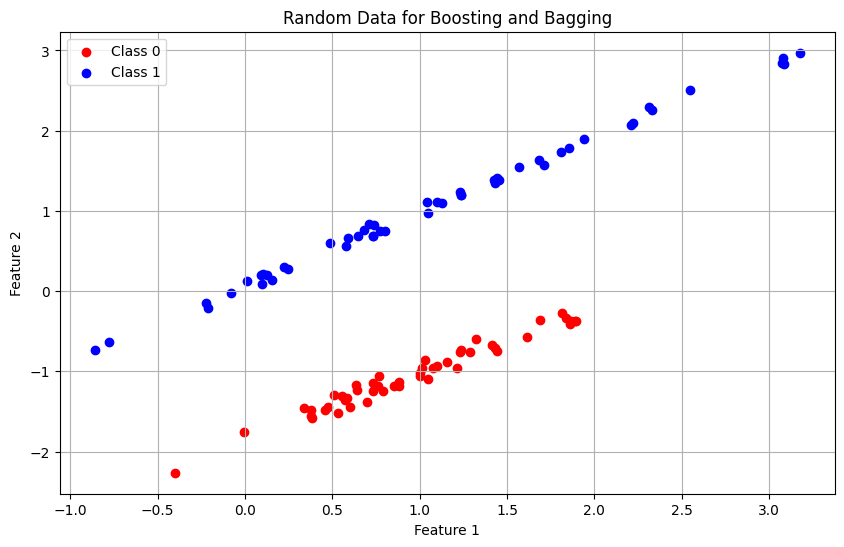

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate random data for classification
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, random_state=42)

# Plotting the generated data
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', label='Class 1')
plt.title('Random Data for Boosting and Bagging')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()
plt.show()


#### Application for Regression or Classification
- Bagging: Good for both regression and classification. It effectively reduces overfitting by averaging multiple models.
- Boosting: Primarily used for both regression and classification but tends to perform better in scenarios where the model needs to correct its mistakes.

#### Implementing Bagging and Boosting from Scratch using Numpy
Bagging Implementation

In [2]:
class Bagging:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        for _ in range(self.n_estimators):
            indices = np.random.choice(n_samples, size=n_samples, replace=True)
            X_sample, y_sample = X[indices], y[indices]
            model = self.base_estimator()
            model.fit(X_sample, y_sample)
            self.models.append(model)

    def predict(self, X):
        predictions = np.array([model.predict(X) for model in self.models])
        return np.array([np.bincount(pred).argmax() for pred in predictions.T])

# Sample Base Estimator (Decision Tree)
class SimpleDecisionTree:
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X):
        return np.random.choice(self.y, size=len(X))

# Example Usage
bagging_model = Bagging(SimpleDecisionTree, n_estimators=10)
bagging_model.fit(X, y)
bagging_predictions = bagging_model.predict(X)


Boosting Implementation


In [4]:
class Boosting:
    def __init__(self, base_estimator, n_estimators=10):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators
        self.models = []

    def fit(self, X, y):
        n_samples = X.shape[0]
        weights = np.ones(n_samples) / n_samples  # Initialize weights

        for _ in range(self.n_estimators):
            model = self.base_estimator()
            model.fit(X, y)  # Pass weights to the base estimator
            predictions = model.predict(X)
            errors = predictions != y

            # Update weights
            alpha = self._calculate_alpha(errors, weights)
            weights *= np.exp(alpha * errors)  # Increase weights for misclassified samples
            weights /= np.sum(weights)  # Normalize

            self.models.append((alpha, model))

    def _calculate_alpha(self, errors, weights):
        error_rate = np.sum(weights[errors]) / np.sum(weights)
        return 0.5 * np.log((1 - error_rate) / (error_rate + 1e-10))

    def predict(self, X):
        final_prediction = np.zeros(X.shape[0])
        for alpha, model in self.models:
            final_prediction += alpha * model.predict(X)
        return np.sign(final_prediction)

# Example Usage
boosting_model = Boosting(SimpleDecisionTree, n_estimators=10)
boosting_model.fit(X, y)
boosting_predictions = boosting_model.predict(X)


#### When to Use and When Not to Use
When to Use:
- Bagging:

    - When the base estimator is high-variance (e.g., decision trees).
    - When you want to reduce overfitting.
    - When you have enough data and want to improve model stability.

- Boosting:

    - When the base estimator is weak and needs improvement.
    - When you want to reduce both bias and variance.
    - When your dataset is small to moderate in size and needs a strong predictive model.

When Not to Use:
- Bagging:

    - When your model is already very stable (e.g., linear regression).
    - When interpretability is a critical requirement, as ensemble models can become complex.
- Boosting:

    - When the model is prone to overfitting on noisy datasets.
    - When computational efficiency is a concern, as boosting is usually slower due to its sequential nature.


#### Visualization of Boosting and Bagging
Visualizing the performance of bagging and boosting can be done through learning curves or error plots. Below is an example of how to visualize the decision boundaries for both models:

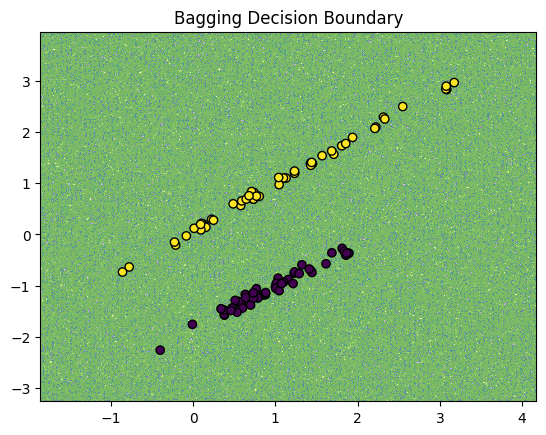

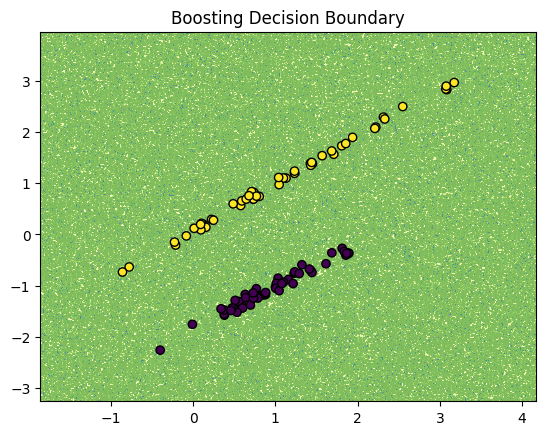

In [5]:
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

# Visualize Bagging Decision Boundary
bagging_model.fit(X, y)  # Refit to ensure all data is used
plot_decision_boundary(bagging_model, X, y, 'Bagging Decision Boundary')

# Visualize Boosting Decision Boundary
boosting_model.fit(X, y)  # Refit to ensure all data is used
plot_decision_boundary(boosting_model, X, y, 'Boosting Decision Boundary')
